# Model Selection

#### Importamos librerias

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import cm

# Preprocesado y modelado
# ==============================================================================
import sklearn

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, \
                            mean_squared_error, r2_score, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample

import category_encoders as ce

import xgboost as xgb
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

import pickle

# Configuración warnings
# ==============================================================================
import warnings

In [23]:
def evaluate_model(y_test, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(y_test, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(y_test, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(y_test, ypred)))

#### Importamos los datos y modelos

In [26]:
X_train_lasso = pd.read_parquet("X_train_lasso.parquet")
y_train = pd.read_parquet("y_train.parquet")
X_test_lasso = pd.read_parquet("X_test_lasso.parquet")
y_test = pd.read_parquet("y_test.parquet")

In [43]:
with open('Decision_Tree.pkl', 'rb') as f: decision_tree = pickle.load(f)
with open('CV_RandomForest.pkl', 'rb') as f: random_forest = pickle.load(f)
with open('LightGBM.pkl', 'rb') as f: lightgbm = pickle.load(f)
with open('Gradientboosting.pkl', 'rb') as f: gradient_boost = pickle.load(f)
with open('Adaboost.pickle', 'rb') as f: adaboost = pickle.load(f)

En este apartado estudiaremos los resultados obtenidos previamente de nuestros modelos y decidiremos cual es el modelo que mejor se ajuste a nuestro objetivo

- Analizaremos:
    - Coeficiente ROC-AUC
    - Precision del modelo
    - Evaluacion modelo general
    - Matriz de confusion normalizada y sin normalizar

#### Modelo base: Decision tree

In [33]:
warnings.filterwarnings('ignore')
evaluate_model(y_test, decision_tree.predict(X_test_lasso), decision_tree.predict_proba(X_test_lasso))

ROC-AUC score of the model: 0.7200555361003379
Accuracy of the model: 0.8484014180819331

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91   1440322
           1       0.63      0.22      0.33    288210

    accuracy                           0.85   1728532
   macro avg       0.75      0.60      0.62   1728532
weighted avg       0.82      0.85      0.82   1728532




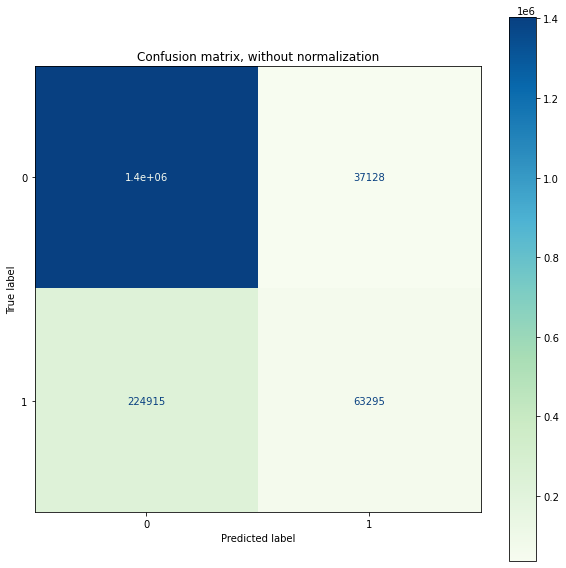

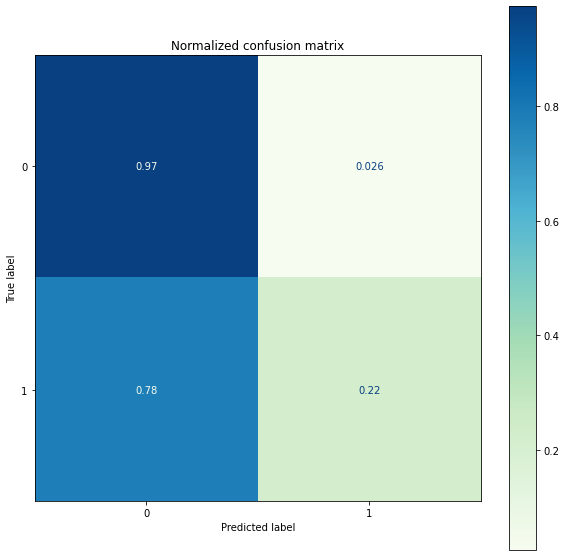

In [39]:
warnings.filterwarnings('ignore')

# Matrices de confusion
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, decision_tree.predict(X_test_lasso),
                                                       cmap=plt.cm.GnBu,
                                                       normalize=normalize,
                                                       ax=ax)
    ax.set_title(title)

#### Random Forest

In [34]:
warnings.filterwarnings('ignore')
evaluate_model(y_test, random_forest.predict(X_test_lasso), random_forest.predict_proba(X_test_lasso))

ROC-AUC score of the model: 0.7754088561175787
Accuracy of the model: 0.8495237577319945

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.92   1440322
           1       0.64      0.23      0.33    288210

    accuracy                           0.85   1728532
   macro avg       0.75      0.60      0.62   1728532
weighted avg       0.83      0.85      0.82   1728532




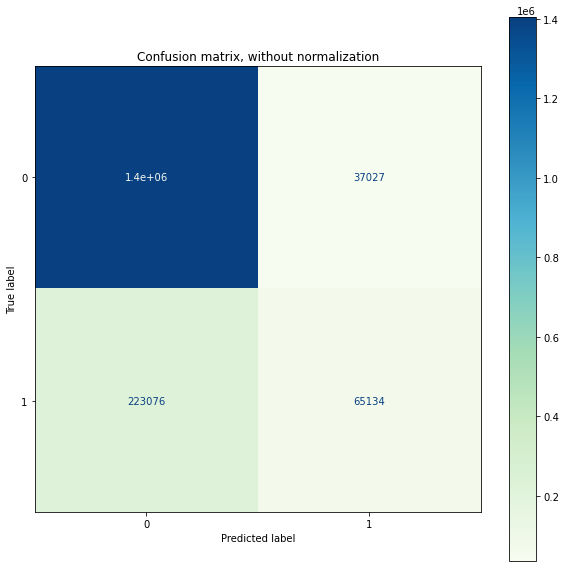

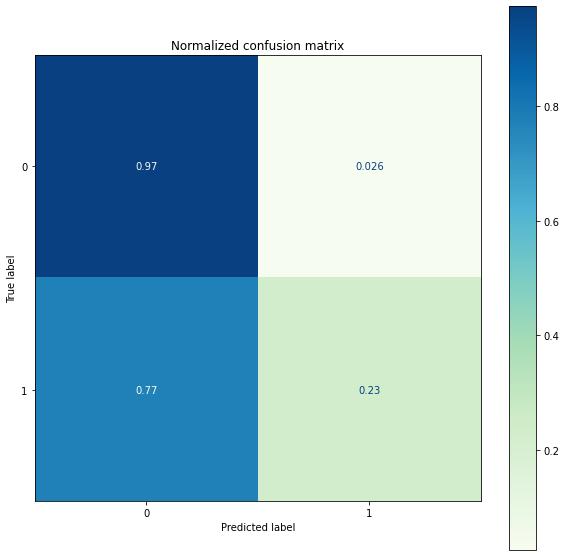

In [40]:
warnings.filterwarnings('ignore')

# Matrices de confusion
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, random_forest.predict(X_test_lasso),
                                                       cmap=plt.cm.GnBu,
                                                       normalize=normalize,
                                                       ax=ax)
    ax.set_title(title)

#### LightGBM

In [35]:
warnings.filterwarnings('ignore')
evaluate_model(y_test, lightgbm.predict(X_test_lasso), lightgbm.predict_proba(X_test_lasso))

ROC-AUC score of the model: 0.7918150504333004
Accuracy of the model: 0.8521190235413634

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92   1440322
           1       0.65      0.24      0.35    288210

    accuracy                           0.85   1728532
   macro avg       0.76      0.61      0.63   1728532
weighted avg       0.83      0.85      0.82   1728532




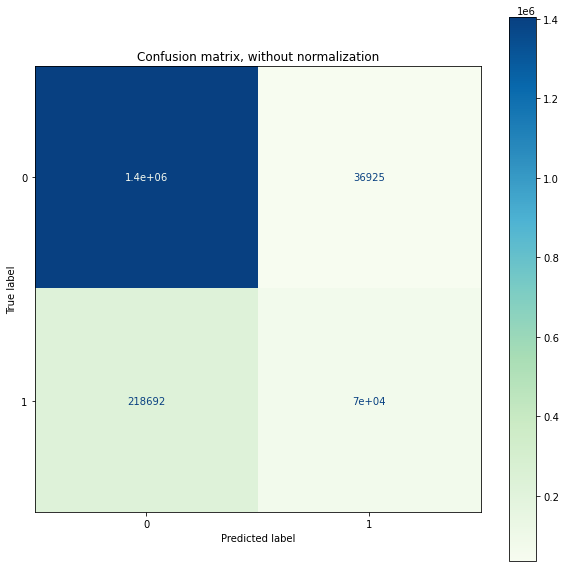

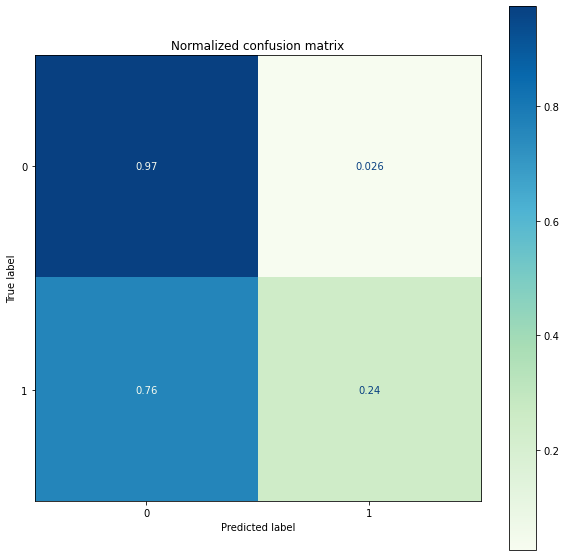

In [41]:
warnings.filterwarnings('ignore')

# Matrices de confusion
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, lightgbm.predict(X_test_lasso),
                                                       cmap=plt.cm.GnBu,
                                                       normalize=normalize,
                                                       ax=ax)
    ax.set_title(title)

#### Grandient Boost

In [44]:
warnings.filterwarnings('ignore')
evaluate_model(y_test, gradient_boost.predict(X_test_lasso), gradient_boost.predict_proba(X_test_lasso))

ROC-AUC score of the model: 0.7942645635254075
Accuracy of the model: 0.8526443247796396

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92   1440322
           1       0.66      0.24      0.35    288210

    accuracy                           0.85   1728532
   macro avg       0.76      0.61      0.64   1728532
weighted avg       0.83      0.85      0.82   1728532




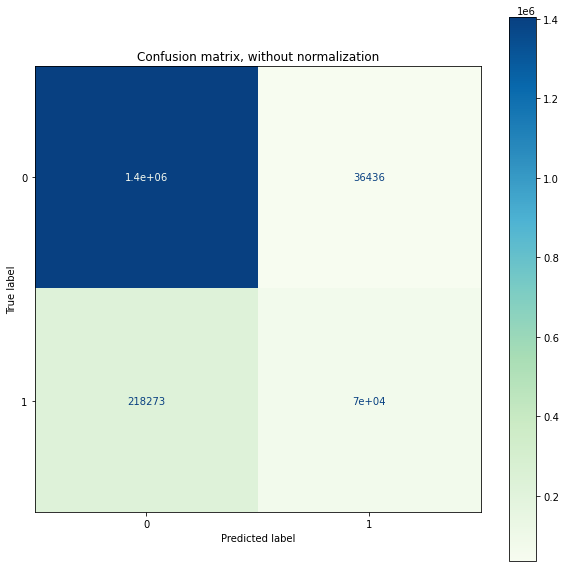

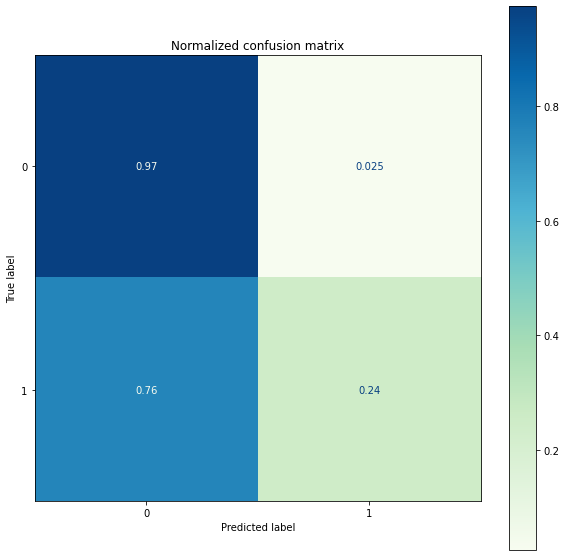

In [45]:
warnings.filterwarnings('ignore')

# Matrices de confusion
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, gradient_boost.predict(X_test_lasso),
                                                       cmap=plt.cm.GnBu,
                                                       normalize=normalize,
                                                       ax=ax)
    ax.set_title(title)

#### AdaBoost

In [36]:
warnings.filterwarnings('ignore')
evaluate_model(y_test, adaboost.predict(X_test_lasso), adaboost.predict_proba(X_test_lasso))

ROC-AUC score of the model: 0.7662841189555369
Accuracy of the model: 0.8480404181120165

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.91   1440322
           1       0.63      0.21      0.32    288210

    accuracy                           0.85   1728532
   macro avg       0.75      0.59      0.62   1728532
weighted avg       0.82      0.85      0.81   1728532




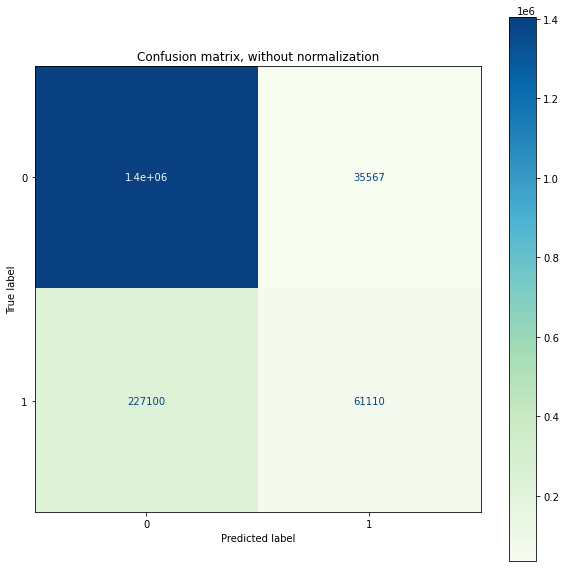

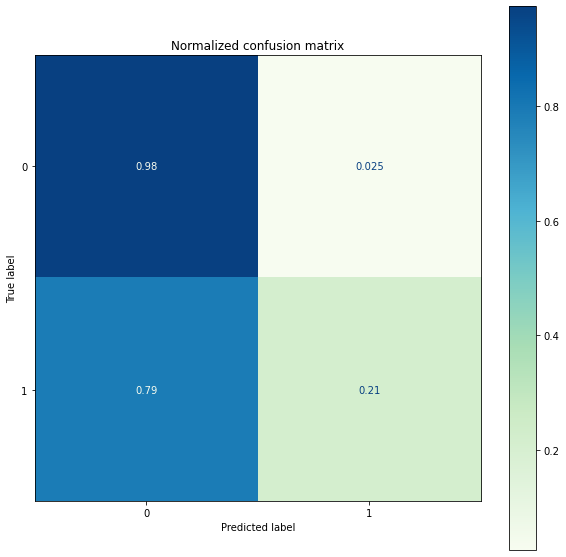

In [42]:
warnings.filterwarnings('ignore')

# Matrices de confusion
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, adaboost.predict(X_test_lasso),
                                                       cmap=plt.cm.GnBu,
                                                       normalize=normalize,
                                                       ax=ax)
    ax.set_title(title)

### Comparamos todos los modelos

Vamos a crear un dataframe con los resultados de los modelos para compararlos.

In [4]:
comparacion = {'Modelos': ['Decision Tree', 'Random Forest', 'LightGBM', 'Gradient Boosting', 'Adaboost'],
               'ROC-AUC': ['0.72', '0.77', '0.79', '0.79', '0.76'],
               'Accuracy': ['0.84', '0.84', '0.85', '0.85', '0.84'],
               'True Positives': ['0.97', '0.97', '0.97', '0.97', '0.98'],
               'False Positives': ['0.026', '0.026', '0.026', '0.025', '0.025'],
               'False Negatives': ['0.78', '0.77', '0.76', '0.76', '0.79'],
               'True Negatives': ['0.22', '0.23', '0.24', '0.24', '0.21']}

df_comparacion = pd.DataFrame(comparacion)
df_comparacion

,Modelos,ROC-AUC,Accuracy,True Positives,False Positives,False Negatives,True Negatives
0,Decision Tree,0.72,0.84,0.97,0.026,0.78,0.22
1,Random Forest,0.77,0.84,0.97,0.026,0.77,0.23
2,LightGBM,0.79,0.85,0.97,0.026,0.76,0.24
3,Gradient Boosting,0.79,0.85,0.97,0.025,0.76,0.24
4,Adaboost,0.76,0.84,0.98,0.025,0.79,0.21


### Conclusión

Analizando el dataframe anterior, observamos que los modelos obtienen unos resultados muy parecidos.

Los tres modelos que tienen un coeficiente ROC-AUC mas alto son los que seleccionaremos en la evaluacion, por lo que no tendremos en cuenta el modelo base con "Decision Tree" ni el modelo "AdaBoost".

Ahora descartaremos el modelo Random Forest debido a que la precision obtenida, siendo el segundo criterio de evaluacion, sea ligeramente inferior a "LightGBM" y "Grandient Boosting".

Para finalizar, observamos que la columna de True Positives contiene valores iguales para ambos modelos, emplearemos los False Positives para compararlos, evaluando de forma negativa tener un valor mas elevado. Por tanto, nuestro modelo seleccionado será el **_Gradient Boosting_** ya que se ajusta mejor a nuestro objetivo. 